In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal as sig

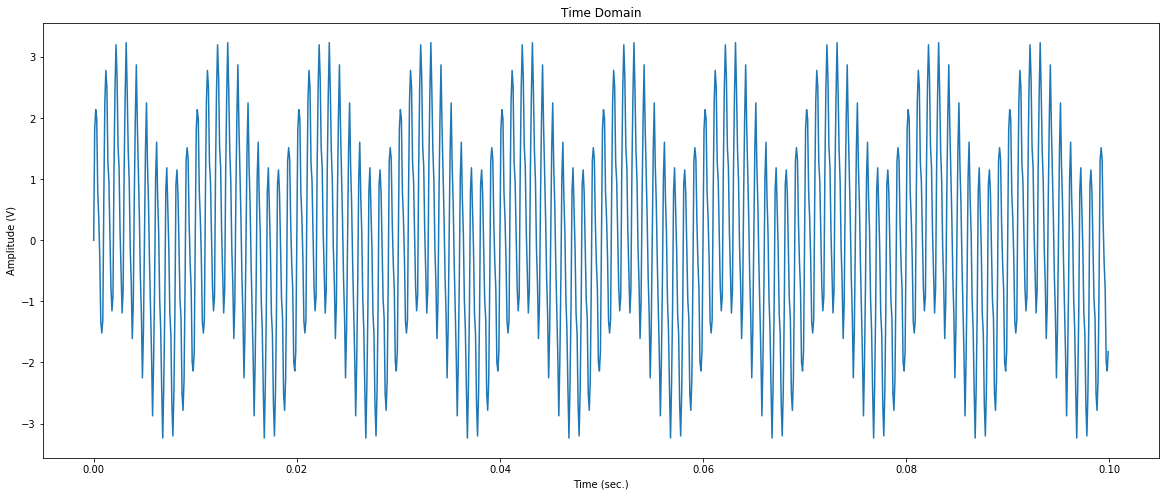

In [2]:
# Signal parameters

amp1 = 1 # V
freq1 = 100 # Hz

amp2 = 2 # V
freq2 = 1000 # Hz

amp3 = 0.5 # V
freq3 = 2000 # Hz

amp4 = 0.2 # V
freq4 = 4100 # Hz


# Sampling parameters

srate = 10000 # Hz
time  = np.arange(0, 0.1, 1/srate)
nyquist = srate/2

# Create the signal

harm1 = amp1 * np.sin( 2 * np.pi * freq1 * time)
harm2 = amp2 * np.sin( 2 * np.pi * freq2 * time)
harm3 = amp3 * np.sin( 2 * np.pi * freq3 * time)
harm4 = amp4 * np.sin( 2 * np.pi * freq4 * time)
signal = harm1 + harm2 + harm3 + harm4

plt.figure(figsize=(20,8))
plt.plot(time,signal)

plt.title('Time Domain')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (V)')
plt.show()

In [3]:
# Compute the amplitude spectrum of the signal

fft = np.abs(scipy.fftpack.fft(signal)) * 2

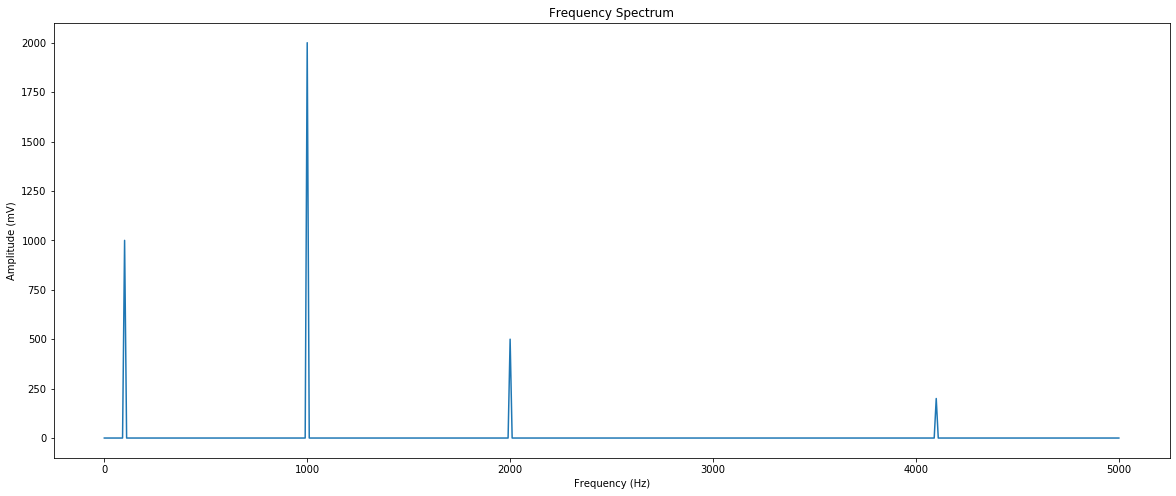

In [4]:
# Compute the frequencies vector
hz = np.linspace(0, nyquist, int(np.floor(len(signal)/2)+1) )

# Remove negative frequencies
fft = fft[0:len(hz)]

plt.figure(figsize=(20,8))
plt.plot(hz,fft)

plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (mV)')
plt.show()

In [5]:
# Filter parameters

frange  = [800,1200] # frequency range for the band pass filter
order = 4 # order parameter (far less than in FIR filter)


In [6]:
# Filter kernel
fkernB, fkernA = scipy.signal.butter(order, np.array(frange)/nyquist, btype='bandpass')

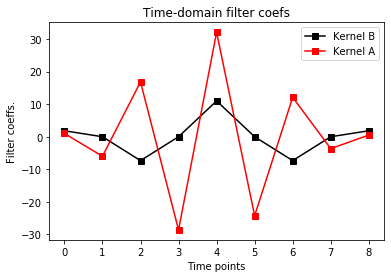

In [7]:
# Plotting

plt.plot(fkernB*10000, 'ks-', label='Kernel B') # Coefficients for kernel B are really small, just multiply by 10000 to see them
plt.plot(fkernA, 'rs-', label='Kernel A')
plt.xlabel('Time points')
plt.ylabel('Filter coeffs.')
plt.title('Time-domain filter coefs')
plt.legend()

In [ ]:
# It is useless to compute the spectrum for the kernels. An IIR  is evaluate by its impulse response.

In [8]:
# Generate the impulse

impulse = np.zeros(len(time))
impulse[int(len(time)/2)] = 1

In [9]:
# Apply the filter (to an impulse)

resp = scipy.signal.lfilter(fkernB, fkernA, impulse)

In [10]:
# Compute spectrum

resp_fft = np.abs(scipy.fftpack.fft(resp))
hz2 = np.linspace(0, nyquist, int(np.floor(len(impulse)/2)+1) )
resp_fft = resp_fft[0:len(hz2)]

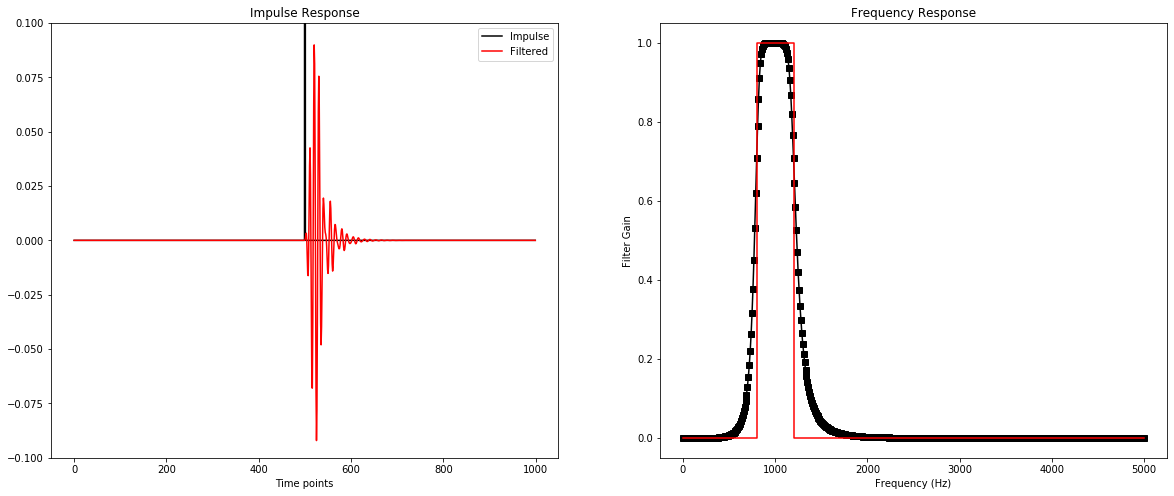

In [11]:
# Plot

plt.figure(figsize=(20,8))

plt.subplot(121)
plt.plot(impulse, 'k', label='Impulse')
plt.plot(resp, 'r', label='Filtered')
plt.ylim([-.1,.1])
plt.legend()
plt.xlabel('Time points')
plt.title('Impulse Response')


plt.subplot(122)
plt.plot(hz2, resp_fft, 'ks-', label='Actual' )
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'r', label='Ideal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter Gain')
plt.title('Frequency Response')
plt.show()

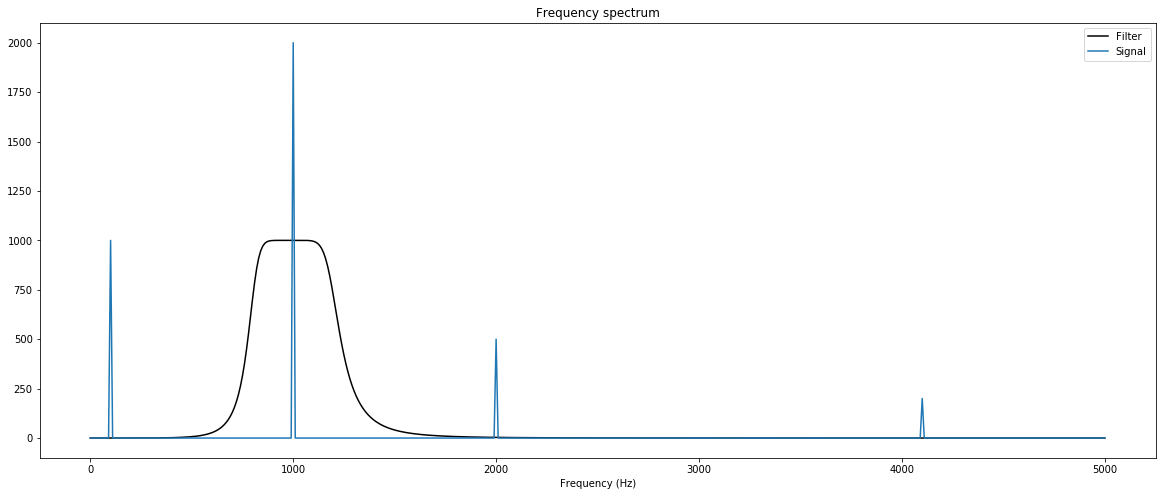

In [12]:
plt.figure(figsize=(20,8))
plt.plot(hz2, resp_fft*1000, 'k', label='Filter')
plt.plot(hz, fft, label='Signal')

plt.xlabel('Frequency (Hz)')
plt.legend()
plt.title('Frequency spectrum')
plt.show()

In [13]:
# Apply the filter (to the original signal)

result = scipy.signal.lfilter(fkernB, fkernA, signal)

In [14]:
# Compute the spectrum for the filtered signal

fft_result = np.abs(scipy.fftpack.fft(result)) * 2
fft_result = fft_result[0:len(hz)]

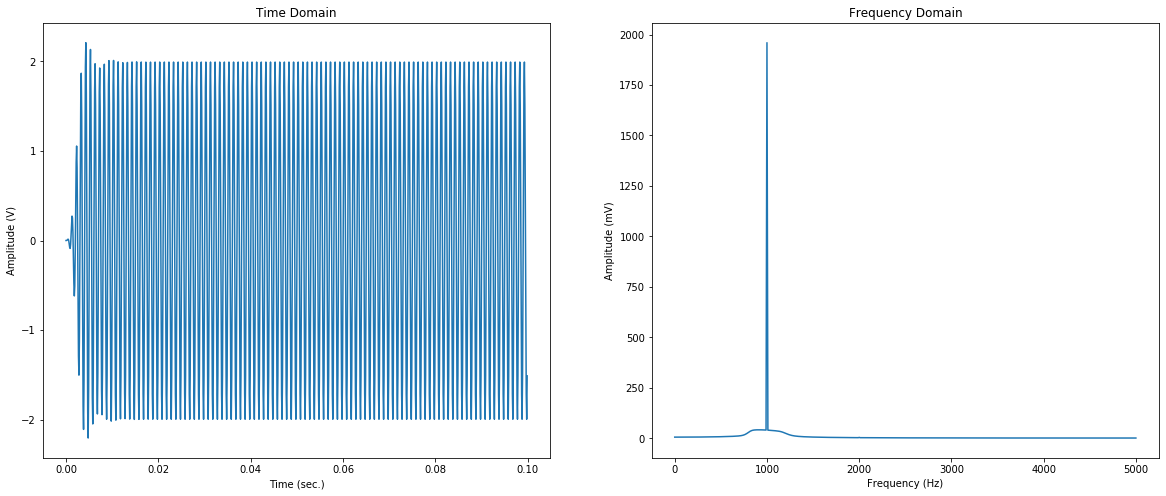

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(121)
plt.plot(time,result)
plt.title('Time Domain')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (V)')

plt.subplot(122)
plt.plot(hz,fft_result)
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (mV)')

plt.show()
